In [61]:
from AnalysisTools.EventDisplay import EventDisplay
import numpy as np
import matplotlib.pyplot as plt

E = 5
nMax=10000
time_bins=np.linspace(0,10,6)
ProcessString='Scintillation'
ProcessStringName = ProcessString if ProcessString else 'AllPhotons'
particle='electron'

ED = EventDisplay('SimulationOutputs/BatchOutput/10000_event_runs/%s_gun_E_%s_sim_output.root'%(particle,str(E)),time_bins=time_bins)
template = ED.CalculateAvgTemplate(nMax=nMax,ProcessString=ProcessString,
                                    template_string='AverageTemplates/10000_event_runs/%s_gun_E_%s_%s_template.json'%(particle,str(E),
                                                                                                     ProcessStringName))
                                   

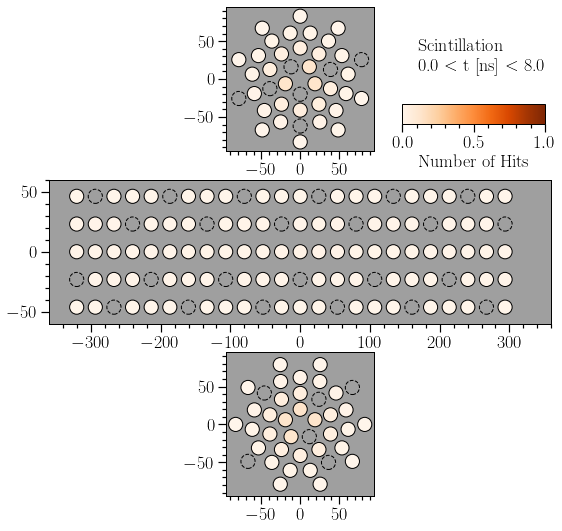

In [62]:
ED.PlotAvgTemplate(vmax=float(E)/5.,time_bin=range(4),
                   ProcessString=ProcessString,
                   SaveString='Figures/AverageTemplates/%s_%s_AvgTemplate_E%s.png'%(particle,
                                                                                 ProcessStringName,
                                                                                 str(E)))


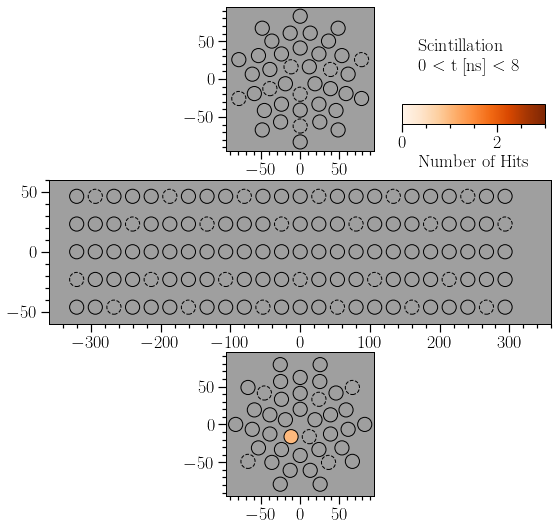

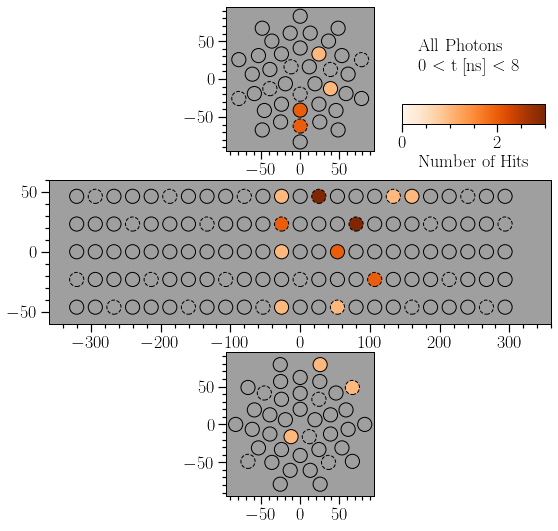

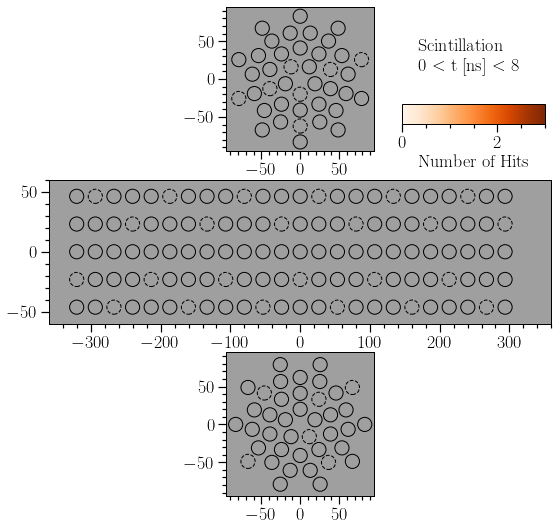

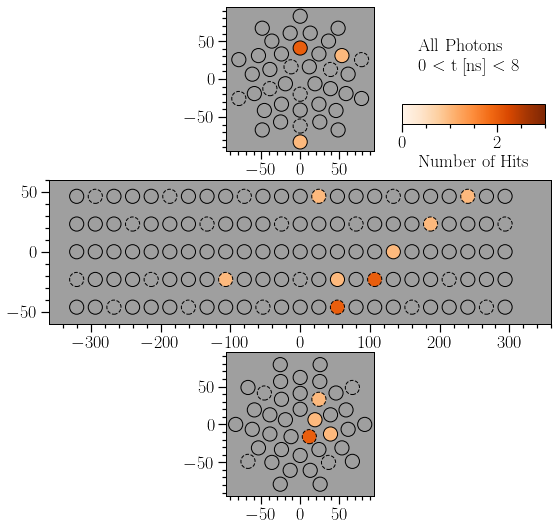

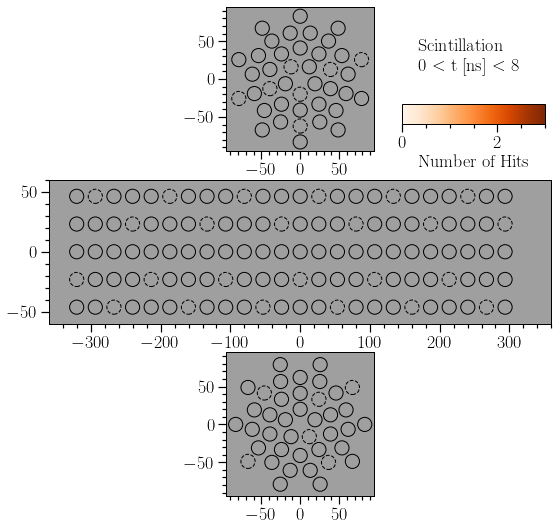

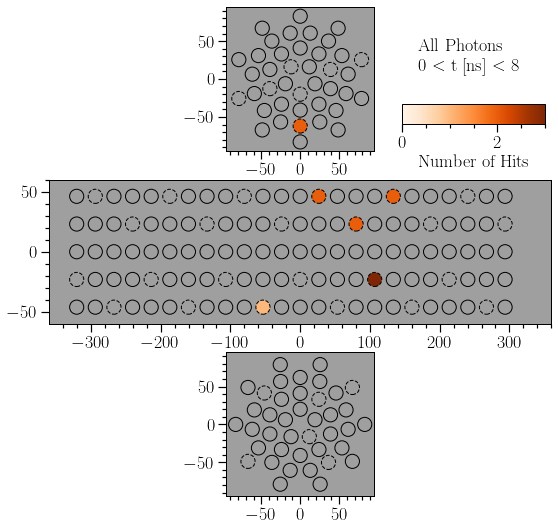

In [64]:
for evenno in range(3):
  for ProcessString in ['Scintillation',None]:
    SaveStr = 'Figures/EventDisplays/%s_E%s_event%i'%(ProcessString if ProcessString is not None else 'AllPhotons',E,evenno)
    ED.PlotAllPMTsTimeSlice(evenno,(0,8),ProcessString=ProcessString,vmax=3,SaveString=SaveStr,DetReco=True)

In [26]:
gif = ED.PlotAllPMTsTimeGif(3,time_width=2,ProcessString='Cerenkov',SaveString='Figures/testED.mp4')

-18.79115884805485 -17.2546449582271 -1.5365138898277486


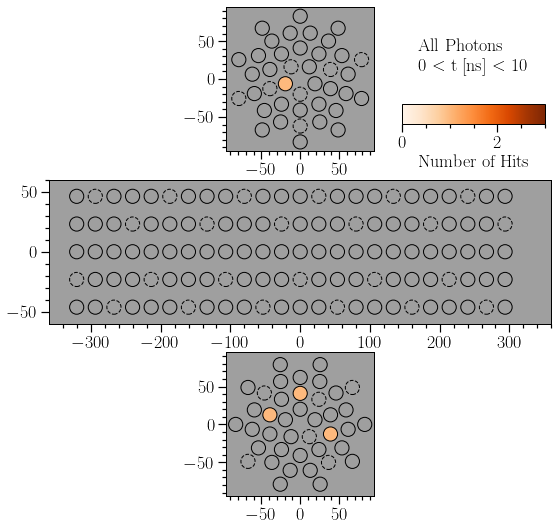

-94.64745722343848 -105.00683951258577 10.359382289147291


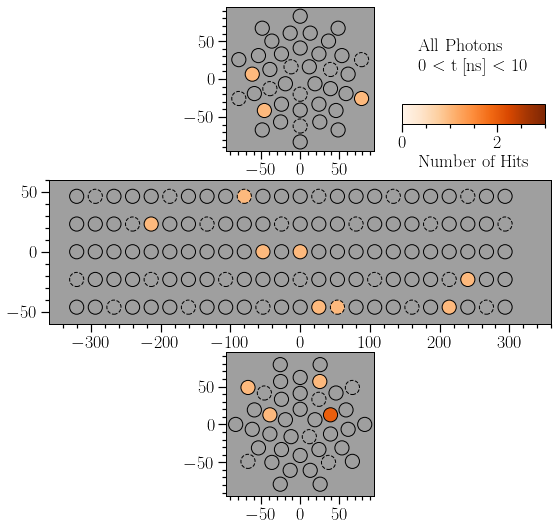

-30.22908807087732 -40.3392623600591 10.110174289181781


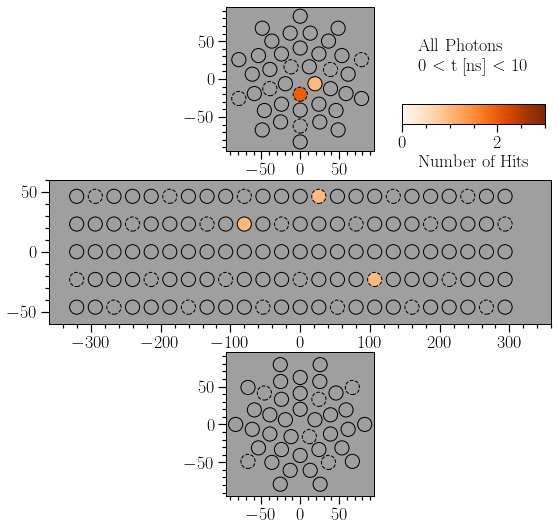

-19.91223727530915 -23.922797226711843 4.010559951402694


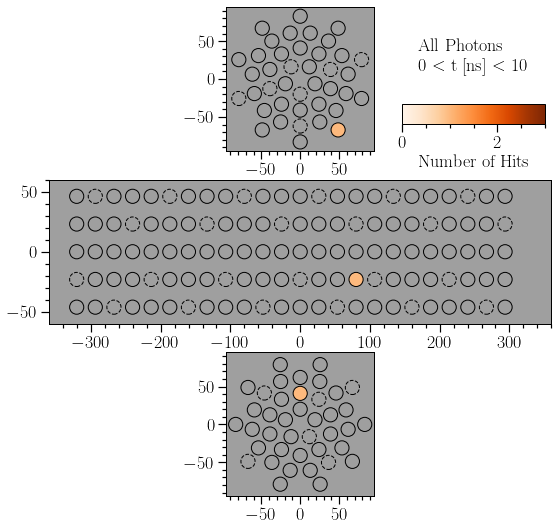

-17.495450896459374 -19.123716282599744 1.6282653861403702


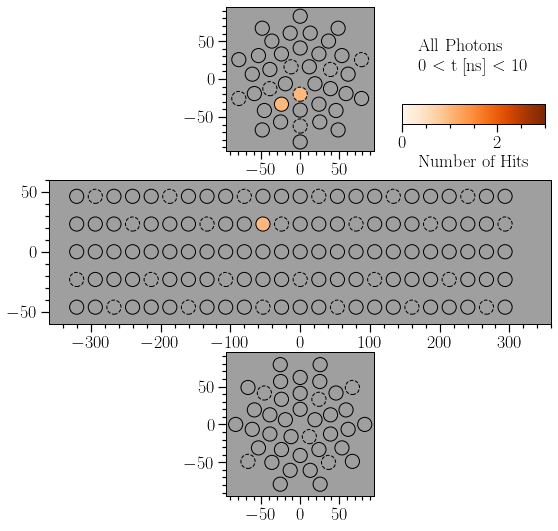

-21.53992005899104 -25.387569923426774 3.847649864435734


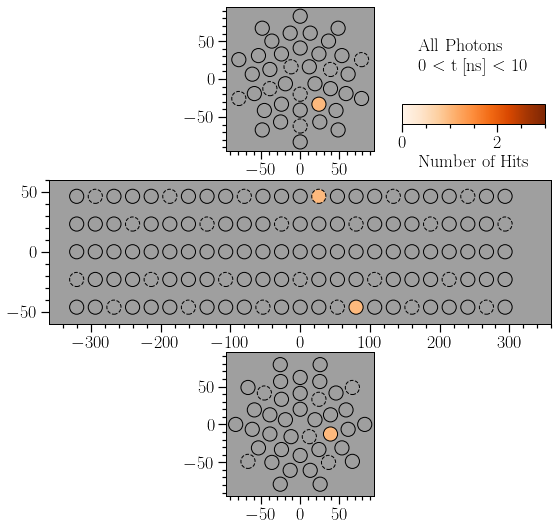

-27.09751757490208 -31.005866643449465 3.908349068547384


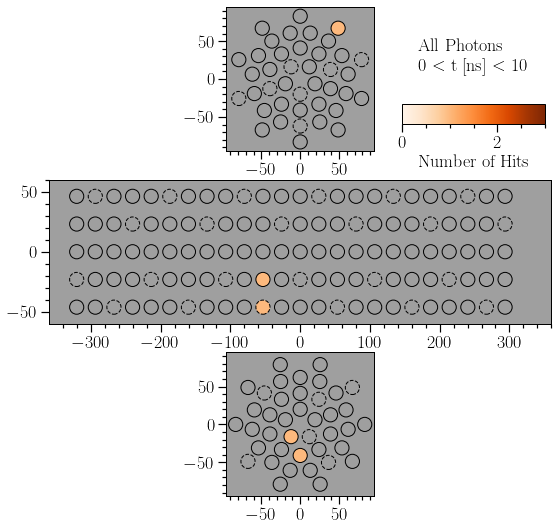

-21.582391957440407 -22.484740539018212 0.9023485815778045


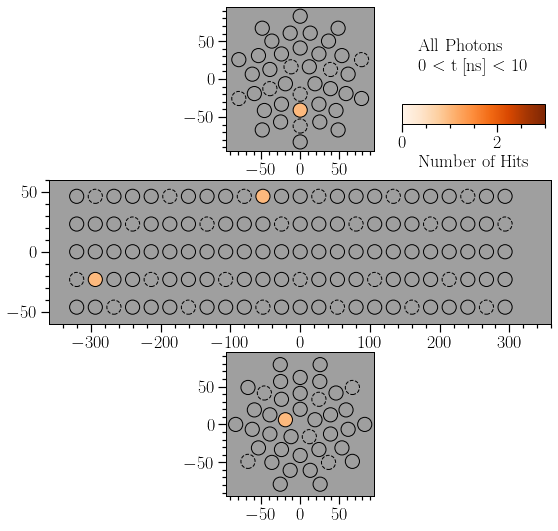

-9.621718711206205 -9.614529802172367 -0.0071889090338377315


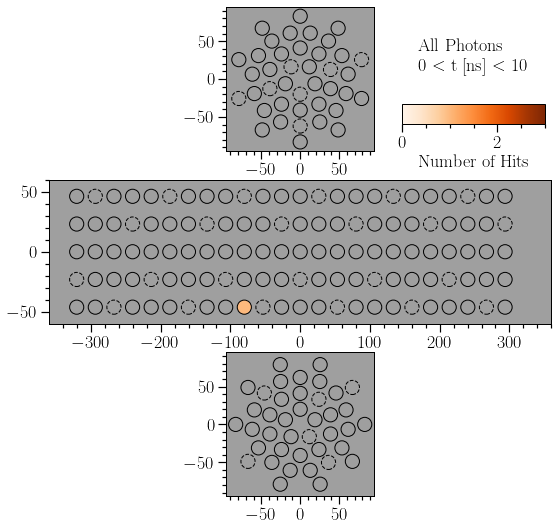

-37.441051598108025 -44.324474977756395 6.88342337964837


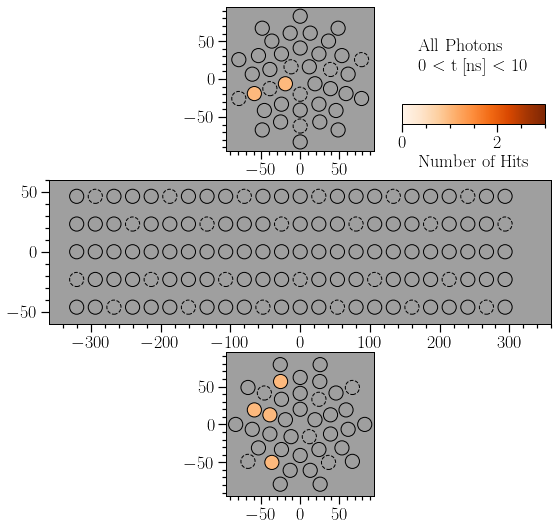

In [4]:
all_template = ED.CalculateAvgTemplate(nMax=nMax,ProcessString=None,
                                       template_string='AverageTemplates/electron_gun_E_%s_AllPhotons_template.json'%(str(E)))
scint_template = ED.CalculateAvgTemplate(nMax=nMax,ProcessString='Scintillation',
                                         template_string='AverageTemplates/electron_gun_E_%s_Scintillation_template.json'%(str(E)))
for evenno in range(10):
  for ProcessString in [None]:
    aLLH = ED.MLE_dataset.LogLikelihood(evenno,template=all_template,prob_one=1./nMax,ProcessString=ProcessString)
    sLLH = ED.MLE_dataset.LogLikelihood(evenno,template=scint_template,prob_one=1./nMax,ProcessString=ProcessString)
    DLLH = (aLLH-sLLH)
    print(aLLH,sLLH,DLLH)
    ED.PlotAllPMTsTimeSlice(evenno,(0,10),ProcessString=ProcessString,vmax=3,DetReco=True)
    
    